<a href="https://colab.research.google.com/github/Aithashivani30/NLP_BATCH_16/blob/main/nlp_ass_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

data = {
    'English': [
        "What is your name?", "Where do you live?", "How old are you?",
        "What do you do for a living?", "What is your favorite color?"
    ],
    'Telugu': [
        "నీ పేరు ఏమిటి?", "నువ్వు ఎక్కడ నివసిస్తున్నావు?", "మీరు ఎంత వయస్సు ఉన్నారు?",
        "మీరు జీవించడానికి ఏమి చేస్తున్నారు?", "మీ ఇష్ట రంగు ఏది?"
    ],
    'Hindi': [
        "आपका नाम क्या है?", "आप कहाँ रहते हैं?", "आपकी उम्र क्या है?",
        "आप क्या करते हैं?", "आपका पसंदीदा रंग क्या है?"
    ],
    'Tamil': [
        "உங்கள் பெயர் என்ன?", "நீங்கள் எங்கு வாழ்கிறீர்கள்?", "உங்கள் வயது என்ன?",
        "நீங்கள் என்ன வேலை செய்கிறீர்கள்?", "உங்கள் விருப்பமான நிறம் என்ன?"
    ]
}

# Combine all questions into one list
all_questions = []
for lang in data.values():
    all_questions.extend(lang)

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(all_questions)
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in all_questions:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and label
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
136/136 ━━━━━━━━━━━━━━━━━━━━ 78s 560ms/step - accuracy: 0.6859 - loss: 0.5683 - val_accuracy: 0.8410 - val_loss: 0.3708
Epoch 2/2
136/136 ━━━━━━━━━━━━━━━━━━━━ 72s 490ms/step - accuracy: 0.8994 - loss: 0.2635 - val_accuracy: 0.8306 - val_loss: 0.3734
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8319 - loss: 0.3757
LSTM Model Accuracy: 0.8337
Epoch 1/2
136/136 ━━━━━━━━━━━━━━━━━━━━ 71s 507ms/step - accuracy: 0.6267 - loss: 0.6159 - val_accuracy: 0.8266 - val_loss: 0.3883
Epoch 2/2
136/136 ━━━━━━━━━━━━━━━━━━━━ 69s 508ms/step - accuracy: 0.8855 - loss: 0.2809 - val_accuracy: 0.8394 - val_loss: 0.3599
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8427 - loss: 0.3588
GRU Model Accuracy: 0.8431


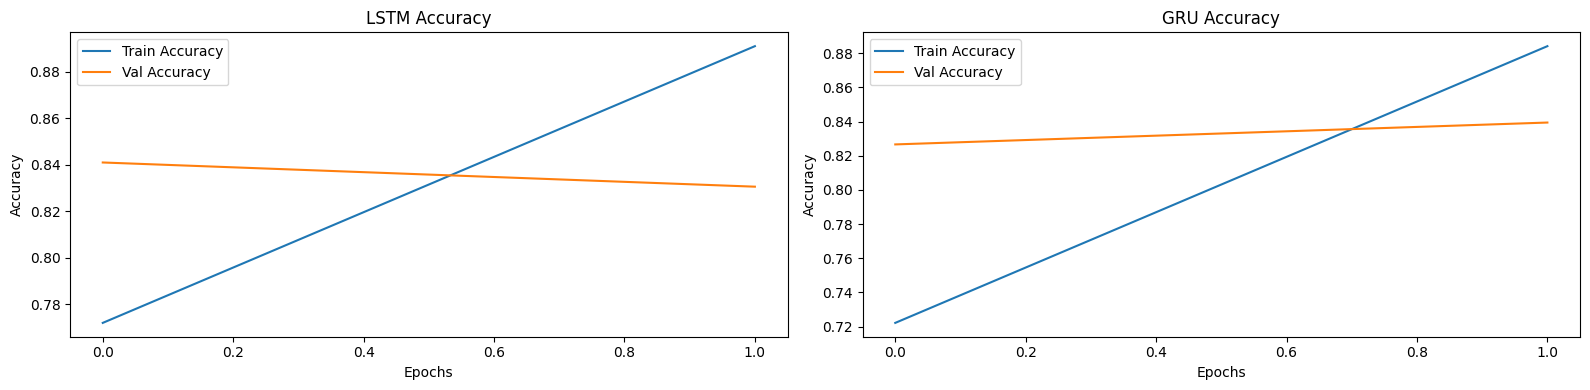

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 148))
    model.add(LSTM(148))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 148))
    model.add(GRU(148))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=148, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=148, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()